# Q1 - (a)

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data from csv file
df = pd.read_csv("soil_moisture.csv")
df = df.rename({'Avg_smlvl_at15cm': 'avg_soil_moisture'}, axis=1)
df.head()

,State,District,Date,Year,Month,avg_soil_moisture,Agency_name
0,Andaman & Nicobar,Nicobars,2022-09-01,2022,9,NaN,NRSC VIC MODEL
1,Andaman & Nicobar,Nicobars,2022-09-02,2022,9,NaN,NRSC VIC MODEL
2,Andaman & Nicobar,Nicobars,2022-09-03,2022,9,NaN,NRSC VIC MODEL
3,Andaman & Nicobar,Nicobars,2022-09-04,2022,9,NaN,NRSC VIC MODEL
4,Andaman & Nicobar,Nicobars,2022-09-07,2022,9,NaN,NRSC VIC MODEL


In [ ]:
# check shape of dataset
df.shape

(19791, 7)

In [ ]:
# check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19791 entries, 0 to 19790
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              19791 non-null  object 
 1   District           19791 non-null  object 
 2   Date               19791 non-null  object 
 3   Year               19791 non-null  int64  
 4   Month              19791 non-null  int64  
 5   avg_soil_moisture  19683 non-null  float64
 6   Agency_name        19791 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
# get statistical observation
df.describe()

## Analysis for moisture columns
## Average mositure value is 22.59
## min and max values are 0.70 and 38.40 resectively.

,Year,Month,avg_soil_moisture
count,19791.0,19791.0,19683.000000
mean,2022.0,9.0,22.598401
std,0.0,0.0,6.910616
min,2022.0,9.0,0.706063
25%,2022.0,9.0,18.513690
50%,2022.0,9.0,23.726072
75%,2022.0,9.0,27.616583
max,2022.0,9.0,38.409035


In [ ]:
# check for null values
df.isnull().sum()

## Analysis
## 108 soil moisture values are null

State                  0
District               0
Date                   0
Year                   0
Month                  0
avg_soil_moisture    108
Agency_name            0
dtype: int64

## Data Visulization

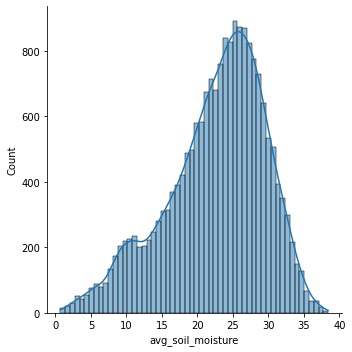

In [ ]:
# histogram of avg soil moisture
sns.displot(df.avg_soil_moisture, kde=True)
plt.show()


## Analysis
## deviation of data from its mean value is vely less. thats why curve is higher.
## more values are there in between in range (15, 13).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


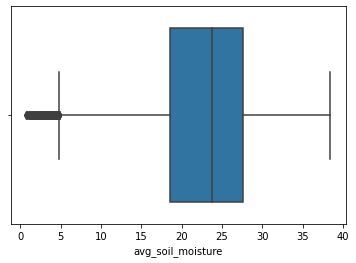

In [ ]:
# box plot of avg_soil_moisture
sns.boxplot(df.avg_soil_moisture)
plt.show()


## Analysis
## There is no outlier in avg soil moisture feature

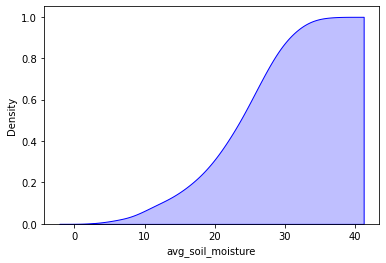

In [ ]:
# cdf of avg soil moisture
# sns.displot(df.Avg_smlvl_at15cm, kde=True)
sns.kdeplot(df.avg_soil_moisture, cumulative=True, fill=True, color='b')
plt.show()


## Analysis
## almost 80% of value of average soil mositure is less than 30.

## Dataset Description in Brief

In [ ]:
# Dataset have 7 columns and 19791 rows.
# this dataset can be used for Regression task.
# we can use this dataset to predict the soil moisture for next day based on past data.
# in given dataset only "average soil moisture" is continous feature.

## Analysis Summary

In [ ]:
# Average value of soil mositure is 22.59
# min and max values are 0.70 and 38.40 resectively.
# 108 soil moisture values are null ingiven dataset.
# deviation of data from its mean value is vely less. thats why density curve is higher.
# we can see from cdf almost 80 % of value of average soil mositure is less than 30.

## perform normalization

In [ ]:
# fill null values 
df.avg_soil_moisture = df.avg_soil_moisture.fillna(df.avg_soil_moisture.mean())

In [ ]:
# now zero null values in dataset
df.isnull().sum()

State                0
District             0
Date                 0
Year                 0
Month                0
avg_soil_moisture    0
Agency_name          0
dtype: int64

In [ ]:
# perform normalization
from sklearn.preprocessing import MinMaxScaler


# print first 10 rows before normalization
df1 = df.copy()
print(df1.iloc[9, :])
scaler = MinMaxScaler()
df1['avg_soil_moisture'] = scaler.fit_transform(df1.avg_soil_moisture.to_numpy().reshape(-1, 1))


# print first 10 rows after normalization
print()
print(df1.iloc[9, :])


State                Andaman & Nicobar
District                      Nicobars
Date                        2022-09-10
Year                              2022
Month                                9
avg_soil_moisture            22.598401
Agency_name             NRSC VIC MODEL
Name: 9, dtype: object

State                Andaman & Nicobar
District                      Nicobars
Date                        2022-09-10
Year                              2022
Month                                9
avg_soil_moisture             0.580653
Agency_name             NRSC VIC MODEL
Name: 9, dtype: object


## Perform Standardization

In [ ]:
# perform standardization
from sklearn.preprocessing import StandardScaler


# print first 10 rows before standardization
df2 = df.copy()
print(df2.iloc[9, :])
scaler = StandardScaler()
df2['avg_soil_moisture'] = scaler.fit_transform(df2.avg_soil_moisture.to_numpy().reshape(-1, 1))


# print first 10 rows after standardization
print()
print(df2.iloc[9, :])

State                Andaman & Nicobar
District                      Nicobars
Date                        2022-09-10
Year                              2022
Month                                9
avg_soil_moisture            22.598401
Agency_name             NRSC VIC MODEL
Name: 9, dtype: object

State                Andaman & Nicobar
District                      Nicobars
Date                        2022-09-10
Year                              2022
Month                                9
avg_soil_moisture                  0.0
Agency_name             NRSC VIC MODEL
Name: 9, dtype: object
